In [1]:
import numpy as np
import pylab
import matplotlib.pyplot as plt
from qiskit.circuit.library import TwoLocal, EfficientSU2

import sys
sys.path.append('../utility')
from vqe_run import *
from qc_ansatze import *

# lambda = 2.0

this notebook is a copy of the lambda=0.2 notebook. Original 8 ansatze were used. 

In [2]:
Hpauli =[('IIIIII', 7.5),
  ('IIIIIZ', -0.5),
  ('IIIIZI', -0.5),
  ('IIIZII', -0.5),
  ('IIZIII', -0.5),
  ('IXXIXX', -0.5),
  ('IZIIII', -0.5),
  ('XIXXIX', -0.5),
  ('XXIXXI', -0.5),
  ('ZIIIII', -0.5)]

from qiskit.quantum_info import SparsePauliOp
from qiskit_algorithms import NumPyEigensolver
H4q = SparsePauliOp.from_list(Hpauli)

# exactly diagonalize the system using numpy routines
solver = NumPyEigensolver(k=4)
exact_solution = solver.compute_eigenvalues(H4q)
print("Exact Result of qubit hamiltonian:", np.real(exact_solution.eigenvalues))
E_exact = np.round(np.real(exact_solution.eigenvalues)[0],5)
E_exact

Exact Result of qubit hamiltonian: [4.26794919 5.09678807 5.09678807 5.09678807]


4.26795

# TwoLocal circuit ansatze

In [3]:
reps=1
ansatz_2a = TL_ansatz(H4q.num_qubits, 'ry', 'rxx', "circular", reps)
ansatz_2b = TL_ansatz(H4q.num_qubits, ['ry','rz'], 'rxx', 'circular', reps)

ansatz_3a = TL_ansatz(H4q.num_qubits, 'ry', 'rcccx', 'circular', reps)
ansatz_3b = TL_ansatz(H4q.num_qubits,['ry','rz'], 'rcccx', 'circular', reps)

ansatz_4a =  TL_ansatz(H4q.num_qubits, 'ry', 'rccx', 'circular', reps)
ansatz_4b =  TL_ansatz(H4q.num_qubits, ['ry','rz'], 'rccx', 'circular', reps)

Circuit ansatz with 18 parameters
Circuit ansatz with 30 parameters
Circuit ansatz with 12 parameters
Circuit ansatz with 24 parameters
Circuit ansatz with 12 parameters
Circuit ansatz with 24 parameters


In [4]:
tl = [ansatz_2a,ansatz_2b,ansatz_3a, ansatz_3b,
     ansatz_4a,ansatz_4b]
tl_names = ['ansatz_2a','ansatz_2b','ansatz_3c', 'ansatz_3b',
     'ansatz_4a','ansatz_4b']

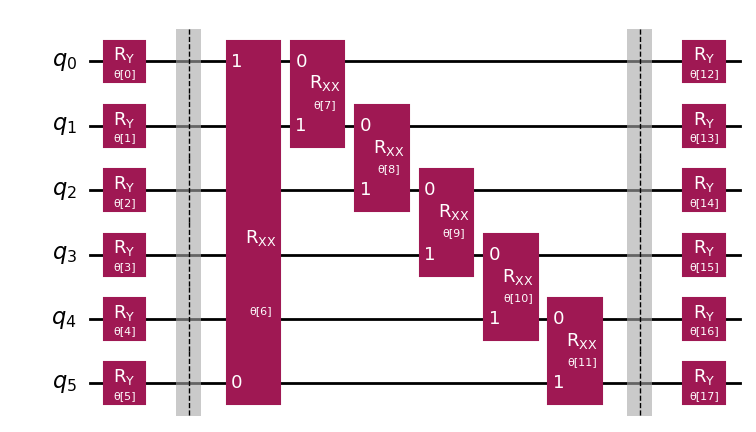

In [5]:
tl[0].decompose().draw(output='mpl')

# QVE

## COBYLA: TwoLocal

In [6]:
res_list = []
for i in range(len(tl)):
    print(f'At step {i} with {tl_names[i]}')
    qve = QVE(COBYLA, tl[i], H4q, iterations_=250)
    result = qve.run_qve_w_specified_optimizer()
    print(f'Length of this optimization {len(qve.values)} \n')
    res_list.append(pd.DataFrame({tl_names[i]:qve.values}))
    
df2 = pd.concat([res_list[i] for i in range(len(res_list))], axis = 1)
df2.to_csv('results/qve_l2_l2.0_twolocal_t2_cobyla.csv')

At step 0 with ansatz_2a
VQE result: 4.47949
Length of this optimization 194 

At step 1 with ansatz_2b
VQE result: 4.49316
Length of this optimization 250 

At step 2 with ansatz_3c
VQE result: 4.51660
Length of this optimization 138 

At step 3 with ansatz_3b
VQE result: 4.47070
Length of this optimization 250 

At step 4 with ansatz_4a
VQE result: 4.54980
Length of this optimization 149 

At step 5 with ansatz_4b
VQE result: 4.51172
Length of this optimization 250 



In [7]:
df2

,ansatz_2a,ansatz_2b,ansatz_3c,ansatz_3b,ansatz_4a,ansatz_4b
0,7.284180,7.656250,6.842773,7.370117,7.505859,7.488281
1,6.862305,7.371094,6.332031,6.941406,7.397461,7.312500
2,6.480469,7.026367,6.583008,6.803711,7.407227,7.566406
3,6.274414,7.043945,6.458984,6.552734,7.647461,7.350586
4,6.658203,6.774414,6.444336,6.836914,7.402344,7.383789
...,...,...,...,...,...,...
245,NaN,4.500000,NaN,4.473633,NaN,4.515625
246,NaN,4.499023,NaN,4.476562,NaN,4.518555
247,NaN,4.513672,NaN,4.474609,NaN,4.519531
248,NaN,4.493164,NaN,4.470703,NaN,4.516602


## SPSA

In [8]:
res_list = []
for i in range(len(tl)):
    print(f'At step {i} with {tl_names[i]}')
    qve = QVE(SPSA, tl[i], H4q, iterations_=250)
    result = qve.run_qve_w_specified_optimizer()
    res_list.append(pd.DataFrame({tl_names[i]:qve.values}))
    
df3 = pd.concat([res_list[i] for i in range(len(res_list))], axis = 1)
df3.to_csv('results/qve_l2_l2.0_twolocal_t2_spsa.csv')


At step 0 with ansatz_2a
VQE result: 4.49121
At step 1 with ansatz_2b
VQE result: 4.53516
At step 2 with ansatz_3c
VQE result: 4.50195
At step 3 with ansatz_3b
VQE result: 4.48633
At step 4 with ansatz_4a
VQE result: 5.54980
At step 5 with ansatz_4b
VQE result: 4.53809


In [9]:
df3

,ansatz_2a,ansatz_2b,ansatz_3c,ansatz_3b,ansatz_4a,ansatz_4b
0,7.332031,7.863281,6.405273,7.533203,7.305664,7.695312
1,7.536133,7.485352,7.276367,7.251953,7.786133,7.233398
2,7.316406,7.694336,7.342773,7.984375,7.862305,7.935547
3,7.356445,7.727539,6.664062,6.869141,7.353516,7.211914
4,7.474609,7.483398,6.715820,7.386719,7.392578,7.481445
...,...,...,...,...,...,...
546,4.590820,4.591797,4.530273,4.543945,5.625977,4.610352
547,4.599609,4.572266,4.535156,4.568359,5.609375,4.583984
548,4.579102,4.528320,4.556641,4.596680,5.635742,4.615234
549,4.553711,4.581055,4.534180,4.581055,5.592773,4.563477
